# Handwritten Digits Recognition

**MNIST**: Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)

1.10.0


In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

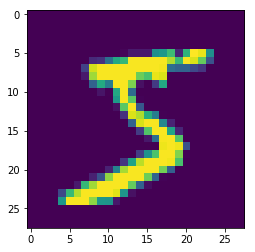

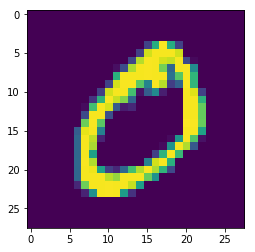

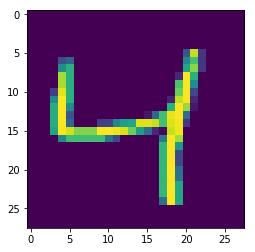

In [4]:
for i in range(3):
    plt.imshow(x_train[i])
    plt.show()

In [5]:
# Normalization
x_train, x_test = x_train/255.0, x_test/255.0

In [6]:
# Callback for cancelling the training when it reached the given accuracy
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') > 0.99):
            print('\nReached 99% accuracy, so cancelling the training!')
            self.model.stop_training = True

In [7]:
callbacks = myCallback()

In [8]:
# Defining model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Configure the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
# Train the model
model.fit(x_train, y_train, epochs=20, callbacks=[callbacks]);

Epoch 1/20
60000/60000 [==============================] - 11s 186us/step - loss: 0.2033 - acc: 0.9395
Epoch 2/20
60000/60000 [==============================] - 12s 195us/step - loss: 0.0802 - acc: 0.9757
Epoch 3/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.0526 - acc: 0.9836
Epoch 4/20
60000/60000 [==============================] - 12s 201us/step - loss: 0.0374 - acc: 0.9879
Epoch 5/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.0265 - acc: 0.9918

Reached 99% accuracy, so cancelling the training!


In [12]:
# Model evaluation (loss, accuracy)
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 58us/step


[0.07145941723757424, 0.9796]